# Iris Flowers Classification ML Project

#### Importing numpy, pandas, matplotlib, seaborn, scikit-learn

In [1]:
%matplotlib inline

In [2]:
!pip install pandas numpy matplotlib seaborn sklearn pickle

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [4]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# removing the unnecessary column 'Id'
df.drop('Id', axis = 1, inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Let's see if our dataset is a balanced one or not


In [9]:
df['Species'].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
df.isnull().value_counts()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
False          False         False          False         False      150
dtype: int64

### The above data tells us that there are no missing values in the dataset. So, we can continue with eda and then prediction using scikit-learn.

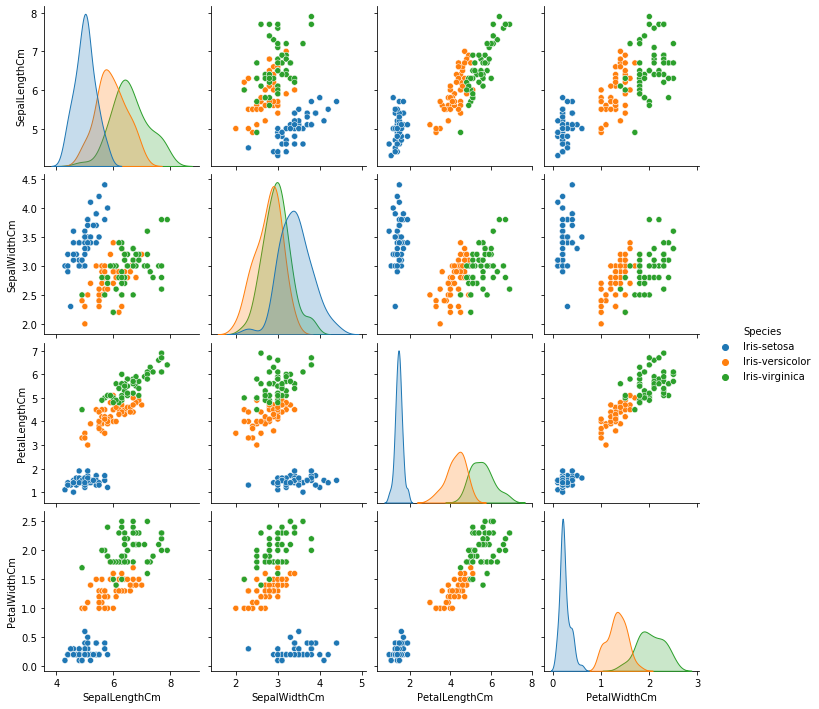

In [11]:
sns.pairplot(df, hue='Species')
plt.show()

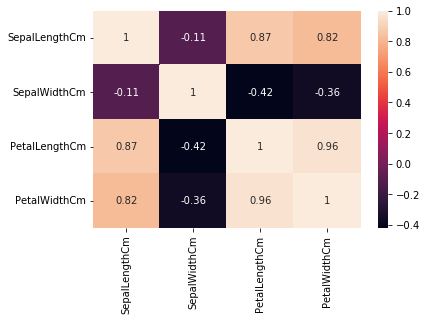

In [12]:
corr = df.corr()
sns.heatmap(corr, annot = True)


The data above tells us that both petal parameters are positively correlated with each other unlike the sepal length and width. Sepal length is more correlated to petal length and width than sepal width.

In [13]:
x = df.drop(columns = 'Species')
y = df['Species']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = False)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [17]:
accuracy = model.score(x_test, y_test)
print(accuracy*100)

97.77777777777777


Now we will test the prediction accuracy of the model using x_test and y_test

In [18]:
predictions = model.predict(x_test)
predictions

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9777777777777777

In [22]:
import pickle
filename='model.pkl'
pickle.dump(model, open(filename, 'wb'))

SyntaxError: invalid syntax (1979244388.py, line 4)

In [24]:
import sys
print(model)

LogisticRegression()
